# Project 4: Hackathon

## *Testing Neural Nets on Hip-Hop Genre* 

In this notebook:

* [Build Neural Net](#build)
* [Evaluate Model](#eval-nn)

#### Import Libraries & Read in Data

In [1]:
## standard imports 
import pandas as pd 
import numpy as np
import re
## visualizations
import matplotlib.pyplot as plt
import seaborn as sns
## preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.dummy import DummyClassifier
## modeling
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import MultinomialNB
## trees
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, AdaBoostClassifier, GradientBoostingRegressor
## NLP
from sklearn.feature_extraction.text import CountVectorizer
## analysis
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, make_scorer, f1_score, mean_squared_error
## Neural Nets
import tensorflow as tf

## options
import sklearn
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 100
pd.set_option('max_colwidth', 100)

In [2]:
### read in data
data = pd.read_csv('../data/hiphop.csv')

In [3]:
data.head()

,genre,track_id,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,is_popular
0,Hip-Hop,2JvzF1RMd7lE3KmFlsyZD8,0.14900,0.837,0.364,0.00000,0.2710,-11.713,0.2760,123.984,0.463,1
1,Hip-Hop,2IRZnDFmlqMuOrYOLnZZyc,0.25900,0.889,0.496,0.00000,0.2520,-6.365,0.0905,86.003,0.544,1
2,Hip-Hop,2t8yVaLvJ0RenpXUIAC52d,0.03950,0.837,0.636,0.00125,0.3420,-7.643,0.0860,145.972,0.274,1
3,Hip-Hop,79OEIr4J4FHV0O3KrhaXRb,0.00195,0.942,0.383,0.00000,0.0922,-8.099,0.5650,100.021,0.380,1
4,Hip-Hop,1xzBco0xcoJEDXktl7Jxrr,0.19400,0.729,0.625,0.00986,0.2480,-5.266,0.0315,146.034,0.261,1


In [4]:
### select data
X = data.drop(columns=['genre', 'track_id', 'is_popular'])
y = data['is_popular']
### TTS
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

## Build Neural Net <a class="anchor" id="build"></a>
<hr/>

In [5]:
tf.random.set_seed(123)

In [5]:
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(X_train.shape[1],)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),   
  tf.keras.layers.Dense(1, activation='sigmoid') # because binary                      
])

In [6]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', 'Recall', 'Precision'],
)

In [8]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [7]:
history = model.fit(X_train, y_train, batch_size=16, epochs=50, validation_split=0.2, verbose=0)

In [8]:
model.save('hiphop01.h5')

In [24]:
# model2 = tf.keras.models.load_model('hiphop01.h5')

## Evaluate Model <a class="anchor" id="eval-nn"></a>
<hr/>

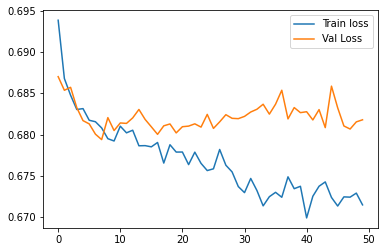

In [9]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

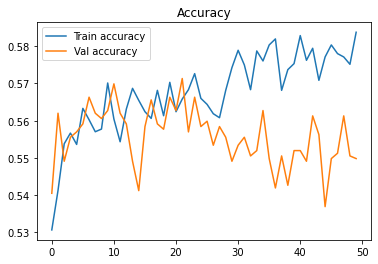

In [10]:
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Val accuracy')
plt.title('Accuracy');
plt.legend();

In [11]:
y_preds = model.predict(X)

In [15]:
y_preds[:10]

array([[0.4305801 ],
       [0.55268353],
       [0.4784869 ],
       [0.44108227],
       [0.52828014],
       [0.4523441 ],
       [0.54588234],
       [0.49185783],
       [0.53572905],
       [0.6010944 ]], dtype=float32)

In [13]:
print('F1 Score: ', f1_score(y, y_preds.round()))

F1 Score:  0.6368038740920097


### Confusion Matrix

In [14]:
confusion_matrix(y, y_preds.round())

array([[1976, 2428],
       [1472, 3419]])

Plotting confusion matrix in function below found at https://deeplizard.com/learn/video/km7pxKy4UHU

Confusion matrix, without normalization
[[1976 2428]
 [1472 3419]]


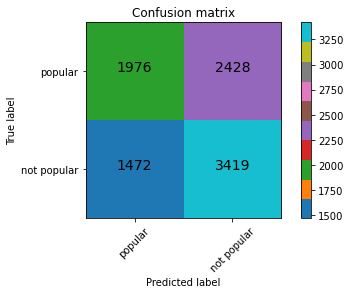

In [15]:
import itertools
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap='tab10'):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
#     plt.imshow(cm)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="black" if cm[i, j] > thresh else "black", fontsize=14)

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
 
    
    pass

cm = confusion_matrix(y, y_preds.round())
plot_confusion_matrix(cm, classes=['popular', 'not popular'], normalize=False)